In [2]:
import numpy as np
import matplotlib.pyplot as plt

---

## 5. What Happens with Non-Orthogonal Bases?

Let's see what happens when we try the same projection method with **non-orthogonal** basis vectors. This will demonstrate why orthogonality is crucial for the simple projection approach.

### The Problem with Non-Orthogonal Bases

When basis vectors are **not orthogonal**, the projection method fails because:

1. **Cross-interference**: Projections onto different basis vectors interfere with each other
2. **Mathematical breakdown**: The key step $\vec{b}_2 \cdot \vec{b}_1 = 0$ no longer holds
3. **Incorrect reconstruction**: The sum of projections doesn't equal the original vector

### Why This Happens

Recall our derivation:
$$\vec{r} \cdot \vec{b}_1 = c_1 (\vec{b}_1 \cdot \vec{b}_1) + c_2 (\vec{b}_2 \cdot \vec{b}_1)$$

For orthogonal bases, $\vec{b}_2 \cdot \vec{b}_1 = 0$, so we get:
$$c_1 = \frac{\vec{r} \cdot \vec{b}_1}{\vec{b}_1 \cdot \vec{b}_1}$$

But for **non-orthogonal** bases, $\vec{b}_2 \cdot \vec{b}_1 \neq 0$, and this simple formula breaks down!

### The Solution: Matrix Methods

For general (non-orthogonal) bases, we must solve the linear system:
$$\mathbf{B}\vec{c} = \vec{r}$$

where $\mathbf{B} = [\vec{b}_1 | \vec{b}_2]$ is the basis matrix and $\vec{c} = [c_1, c_2]^T$ are the coordinates.

The solution is: $\vec{c} = \mathbf{B}^{-1}\vec{r}$

---

## ✅ Summary

| Concept | Orthogonal Basis | Non-Orthogonal Basis |
|---------|------------------|---------------------|
| **Method** | Simple projections | Matrix inversion |
| **Formula** | $c_i = \frac{\vec{r} \cdot \vec{b}_i}{\|\vec{b}_i\|^2}$ | $\vec{c} = \mathbf{B}^{-1}\vec{r}$ |
| **Complexity** | Low (dot products) | Higher (matrix operations) |
| **Accuracy** | Exact ✓ | Exact ✓ |
| **When to use** | $\vec{b}_i \perp \vec{b}_j$ | Any linearly independent basis |

### Key Takeaways

- **Orthogonality simplifies**: Makes basis change as simple as computing projections
- **General case requires matrices**: Non-orthogonal bases need linear system solving
- **Same final result**: Both methods give the correct coordinates when applied properly
- **Choose wisely**: Orthogonal bases (like PCA) are preferred when possible

### Applications
- **PCA**: Creates orthogonal basis vectors (principal components)
- **Gram-Schmidt**: Process to orthogonalize any basis
- **Computer graphics**: Rotation matrices often work with orthonormal bases
- **Signal processing**: Fourier transforms use orthogonal trigonometric functions

---

**Next**: Let's see this failure in action and learn the correct matrix approach!


=== Testing Non-Orthogonal Bases ===
New basis vectors:
  b₁' = [2 1]
  b₂' = [1 1]

Orthogonality check:
  b₁' · b₂' = 3
  Are they orthogonal? ✗ No - NOT orthogonal!

Applying projection method:
  c₁' = 2.200
  c₂' = 4.000

Reconstruction attempt:
  r_reconstructed = 2.200 × [2 1] + 4.000 × [1 1]
  r_reconstructed = [8.4 6.2]
  Original r      = [3 5]
  Reconstruction error: 5.532
  ❌ FAILURE! Projection method doesn't work for non-orthogonal bases
  📝 Note: We need matrix methods for general basis changes


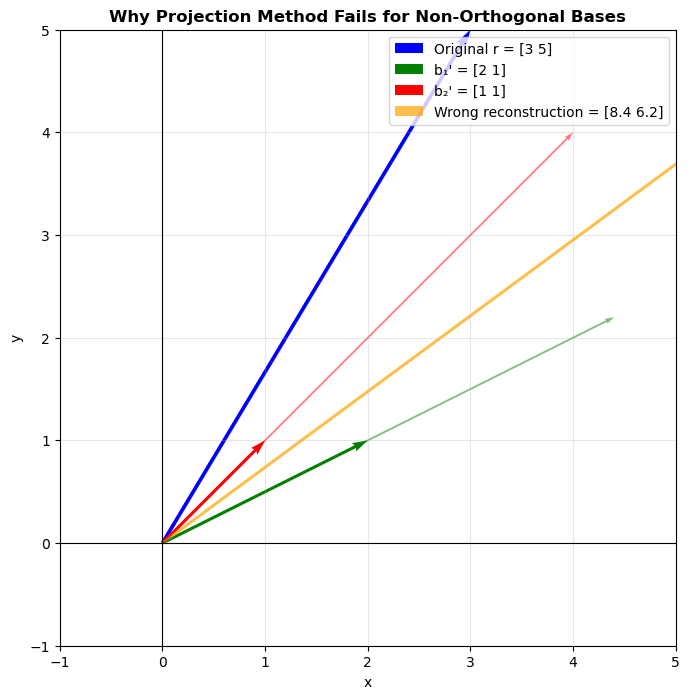


💡 KEY INSIGHT:
   Projection method only works when basis vectors are orthogonal!
   For general bases, we need to solve the linear system:
   [b₁' b₂'] [c₁'] = [r]
             [c₂']


In [4]:
r = np.array([3, 5])


# Demonstrate the problem with non-orthogonal bases
print("=== Testing Non-Orthogonal Bases ===")

# Define non-orthogonal basis vectors
b1_new = np.array([2, 1])     # Same as before
b2_new = np.array([1, 1])     # Different - NOT orthogonal to b1_new

print(f"New basis vectors:")
print(f"  b₁' = {b1_new}")
print(f"  b₂' = {b2_new}")

# Check orthogonality
dot_product_new = np.dot(b1_new, b2_new)
print(f"\nOrthogonality check:")
print(f"  b₁' · b₂' = {dot_product_new}")
print(f"  Are they orthogonal? {'✓ Yes' if dot_product_new == 0 else '✗ No - NOT orthogonal!'}")

# Try the projection method anyway
c1_wrong = np.dot(r, b1_new) / np.dot(b1_new, b1_new)
c2_wrong = np.dot(r, b2_new) / np.dot(b2_new, b2_new)

print(f"\nApplying projection method:")
print(f"  c₁' = {c1_wrong:.3f}")
print(f"  c₂' = {c2_wrong:.3f}")

# Check if reconstruction works
r_wrong = c1_wrong * b1_new + c2_wrong * b2_new
reconstruction_error = np.linalg.norm(r - r_wrong)

print(f"\nReconstruction attempt:")
print(f"  r_reconstructed = {c1_wrong:.3f} × {b1_new} + {c2_wrong:.3f} × {b2_new}")
print(f"  r_reconstructed = {r_wrong}")
print(f"  Original r      = {r}")
print(f"  Reconstruction error: {reconstruction_error:.3f}")

if reconstruction_error > 1e-10:
    print(f"  ❌ FAILURE! Projection method doesn't work for non-orthogonal bases")
    print(f"  📝 Note: We need matrix methods for general basis changes")
else:
    print(f"  ✅ Success (unexpected!)")

# Visualize the problem
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Plot original vector
ax.quiver(0, 0, r[0], r[1], color='blue', angles='xy', scale_units='xy', scale=1, 
          width=0.006, label=f'Original r = {r}', linewidth=2)

# Plot non-orthogonal basis vectors
ax.quiver(0, 0, b1_new[0], b1_new[1], color='green', angles='xy', scale_units='xy', scale=1, 
          width=0.005, label=f"b₁' = {b1_new}", linewidth=1.5)

ax.quiver(0, 0, b2_new[0], b2_new[1], color='red', angles='xy', scale_units='xy', scale=1, 
          width=0.005, label=f"b₂' = {b2_new}", linewidth=1.5)

# Plot wrong reconstruction
ax.quiver(0, 0, r_wrong[0], r_wrong[1], color='orange', angles='xy', scale_units='xy', scale=1, 
          width=0.005, label=f'Wrong reconstruction = {r_wrong}', linewidth=2, alpha=0.7)

# Draw the attempted projections
proj1_wrong = c1_wrong * b1_new
proj2_wrong = c2_wrong * b2_new

ax.quiver(0, 0, proj1_wrong[0], proj1_wrong[1], color='green', angles='xy', scale_units='xy', scale=1, 
          width=0.003, alpha=0.5, linewidth=1)

ax.quiver(0, 0, proj2_wrong[0], proj2_wrong[1], color='red', angles='xy', scale_units='xy', scale=1, 
          width=0.003, alpha=0.5, linewidth=1)

ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)
ax.legend(fontsize=10)
plt.title("Why Projection Method Fails for Non-Orthogonal Bases", fontsize=12, fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(f"\n💡 KEY INSIGHT:")
print(f"   Projection method only works when basis vectors are orthogonal!")
print(f"   For general bases, we need to solve the linear system:")
print(f"   [b₁' b₂'] [c₁'] = [r]")
print(f"             [c₂']")

### The Correct Way: Matrix Solution

For non-orthogonal bases, we need to solve the linear system:

$$\begin{bmatrix} | & | \\ \vec{b}_1' & \vec{b}_2' \\ | & | \end{bmatrix} \begin{bmatrix} c_1' \\ c_2' \end{bmatrix} = \begin{bmatrix} r_x \\ r_y \end{bmatrix}$$

This gives us: $\mathbf{B} \vec{c} = \vec{r}$, so $\vec{c} = \mathbf{B}^{-1} \vec{r}$

=== Correct Solution for Non-Orthogonal Bases ===
Basis matrix B:
B = [b₁' | b₂'] = [[2 1]
 [1 1]]

Solving B × c = r:
c = B⁻¹ × r = [-2.  7.]

Verification:
r_reconstructed = -2.000000 × [2 1] + 7.000000 × [1 1]
                = [3. 5.]
Original r      = [3 5]
Error: 0.00e+00
✅ CORRECT SOLUTION!

📊 COMPARISON:
Projection method (WRONG): [2.200, 4.000] → error = 5.532
Matrix method (CORRECT):   [-2.000, 7.000] → error = 0.00e+00


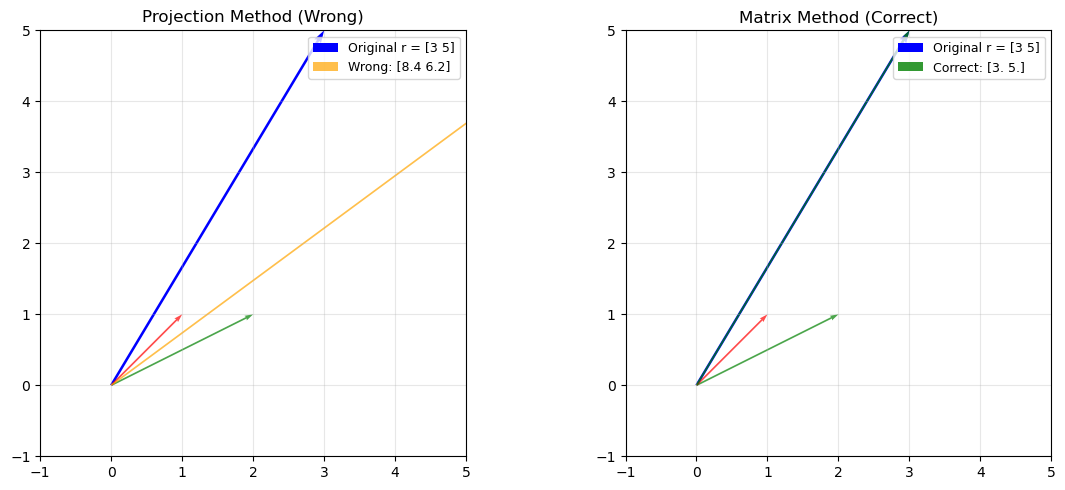

In [5]:
# Solve for non-orthogonal basis using matrix methods
print("=== Correct Solution for Non-Orthogonal Bases ===")

# Create the basis matrix B = [b1' | b2']
B = np.column_stack([b1_new, b2_new])
print(f"Basis matrix B:")
print(f"B = [b₁' | b₂'] = {B}")

# Solve the linear system B * c = r
c_correct = np.linalg.solve(B, r)
print(f"\nSolving B × c = r:")
print(f"c = B⁻¹ × r = {c_correct}")

# Verify the solution
r_correct = c_correct[0] * b1_new + c_correct[1] * b2_new
error_correct = np.linalg.norm(r - r_correct)

print(f"\nVerification:")
print(f"r_reconstructed = {c_correct[0]:.6f} × {b1_new} + {c_correct[1]:.6f} × {b2_new}")
print(f"                = {r_correct}")
print(f"Original r      = {r}")
print(f"Error: {error_correct:.2e}")
print(f"✅ CORRECT SOLUTION!")

print(f"\n📊 COMPARISON:")
print(f"Projection method (WRONG): [{c1_wrong:.3f}, {c2_wrong:.3f}] → error = {reconstruction_error:.3f}")
print(f"Matrix method (CORRECT):   [{c_correct[0]:.3f}, {c_correct[1]:.3f}] → error = {error_correct:.2e}")

# Final visualization comparing both methods
plt.figure(figsize=(12, 5))

# Left plot: Wrong projection method
plt.subplot(1, 2, 1)
plt.quiver(0, 0, r[0], r[1], color='blue', angles='xy', scale_units='xy', scale=1, 
           width=0.006, label=f'Original r = {r}', linewidth=2)
plt.quiver(0, 0, b1_new[0], b1_new[1], color='green', angles='xy', scale_units='xy', scale=1, 
           width=0.004, alpha=0.7, linewidth=1)
plt.quiver(0, 0, b2_new[0], b2_new[1], color='red', angles='xy', scale_units='xy', scale=1, 
           width=0.004, alpha=0.7, linewidth=1)
plt.quiver(0, 0, r_wrong[0], r_wrong[1], color='orange', angles='xy', scale_units='xy', scale=1, 
           width=0.004, label=f'Wrong: {r_wrong}', linewidth=2, alpha=0.7)
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.gca().set_aspect('equal')
plt.grid(True, alpha=0.3)
plt.title("Projection Method (Wrong)")
plt.legend(fontsize=9)

# Right plot: Correct matrix method
plt.subplot(1, 2, 2)
plt.quiver(0, 0, r[0], r[1], color='blue', angles='xy', scale_units='xy', scale=1, 
           width=0.006, label=f'Original r = {r}', linewidth=2)
plt.quiver(0, 0, b1_new[0], b1_new[1], color='green', angles='xy', scale_units='xy', scale=1, 
           width=0.004, alpha=0.7, linewidth=1)
plt.quiver(0, 0, b2_new[0], b2_new[1], color='red', angles='xy', scale_units='xy', scale=1, 
           width=0.004, alpha=0.7, linewidth=1)
plt.quiver(0, 0, r_correct[0], r_correct[1], color='green', angles='xy', scale_units='xy', scale=1, 
           width=0.004, label=f'Correct: {r_correct}', linewidth=2, alpha=0.8)
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.gca().set_aspect('equal')
plt.grid(True, alpha=0.3)
plt.title("Matrix Method (Correct)")
plt.legend(fontsize=9)

plt.tight_layout()
plt.show()